## 修改点
1. 请修改运行代码过程中出现了warning的部分，保证程序正确运行的前提下不再有警告提示
2. 请为下方代码重新梳理相应注释
3. 请在最后一步对地方财政收入的预测值进行评价。（平均绝对误差、中值绝对误差,可解释性方差值等）
4. 请调节模型或者参数，降低预测误差
5. 尝试将两张图、每张图一个曲线的展示形式，修改为1张图中同时展示 真实地方财政收入 和 预测地方财政收入

In [2]:
import pandas as pd
import numpy as np

# 读取数据
data = pd.read_csv('./data/data1.csv',encoding='gbk')
print(data.shape)

(20, 14)


In [3]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,3831732,181.54,448.19,7571.00,6212.70,6370241,525.71,985.31,60.62,65.66,120.0,1.029,5321,64.87
1,3913824,214.63,549.97,9038.16,7601.73,6467115,618.25,1259.20,73.46,95.46,113.5,1.051,6529,99.75
2,3928907,239.56,686.44,9905.31,8092.82,6560508,638.94,1468.06,81.16,81.16,108.2,1.064,7008,88.11
3,4282130,261.58,802.59,10444.60,8767.98,6664862,656.58,1678.12,85.72,91.70,102.2,1.092,7694,106.07
4,4453911,283.14,904.57,11255.70,9422.33,6741400,758.83,1893.52,88.88,114.61,97.7,1.200,8027,137.32
5,4548852,308.58,1000.69,12018.52,9751.44,6850024,878.26,2139.18,92.85,152.78,98.5,1.198,8549,188.14
6,4962579,348.09,1121.13,13966.53,11349.47,7006896,923.67,2492.74,94.37,170.62,102.8,1.348,9566,219.91
7,5029338,387.81,1248.29,14694.00,11467.35,7125979,978.21,2841.65,97.28,214.53,98.9,1.467,10473,271.91
8,5070216,453.49,1370.68,13380.47,10671.78,7206229,1009.24,3203.96,103.07,202.18,97.6,1.560,11469,269.10
9,5210706,533.55,1494.27,15002.59,11570.58,7251888,1175.17,3758.62,109.91,222.51,100.1,1.456,12360,300.55


In [4]:
# 计算各特征之间的pearson相关系数
p_data = data.corr(method='pearson')
print('各特征之间的pearson相关系数的形状为：\n',p_data.shape)

# 保留两位小数
p_data = np.round(p_data,2)
print('各特征之间的pearson相关系数为：\n',p_data)

各特征之间的pearson相关系数的形状为：
 (14, 14)
各特征之间的pearson相关系数为：
        x1    x2    x3    x4    x5    x6    x7    x8    x9   x10   x11   x12  \
x1   1.00  0.95  0.95  0.97  0.97  0.99  0.95  0.97  0.98  0.98 -0.29  0.94   
x2   0.95  1.00  1.00  0.99  0.99  0.92  0.99  0.99  0.98  0.98 -0.13  0.89   
x3   0.95  1.00  1.00  0.99  0.99  0.92  1.00  0.99  0.98  0.99 -0.15  0.89   
x4   0.97  0.99  0.99  1.00  1.00  0.95  0.99  1.00  0.99  1.00 -0.19  0.91   
x5   0.97  0.99  0.99  1.00  1.00  0.95  0.99  1.00  0.99  1.00 -0.18  0.90   
x6   0.99  0.92  0.92  0.95  0.95  1.00  0.93  0.95  0.97  0.96 -0.34  0.95   
x7   0.95  0.99  1.00  0.99  0.99  0.93  1.00  0.99  0.98  0.99 -0.15  0.89   
x8   0.97  0.99  0.99  1.00  1.00  0.95  0.99  1.00  0.99  1.00 -0.15  0.90   
x9   0.98  0.98  0.98  0.99  0.99  0.97  0.98  0.99  1.00  0.99 -0.23  0.91   
x10  0.98  0.98  0.99  1.00  1.00  0.96  0.99  1.00  0.99  1.00 -0.17  0.90   
x11 -0.29 -0.13 -0.15 -0.19 -0.18 -0.34 -0.15 -0.15 -0.23 -0.17  1.00 -0.43  

##### 从表中不难看出，除了x11（居民消费价格指数）外，其余特征均与y（财政收入呈现高度的正相关关系）；同时，各特征之间存在着严重的多重共线性，甚至是完全的共线性。综上，可以利用相关性高的特征作为财政收入预测的关键特征进行分析。

#### 数据探索性分析时引入的特征太多，要直接利用其建模，需要进一步的筛选特征，在这里我们采用最近广泛使用的Lasso特征选择方法进一步筛选特征。

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso

# 读取数据
data = pd.read_csv('data/data1.csv')

# 使用lasso回归方法进行关键特征的选取
lasso = Lasso(1000, random_state=1234)
lasso.fit(data.iloc[:,0:13],data['y'])  # 这里主要是选取与财政收入相关的特征

print('相关系数为：',np.round(lasso.coef_,5))
 
# 计算相关系数非0的个数
print('相关系数非零的个数为：',np.sum(lasso.coef_!=0))

# 返回一个相关系数是否为0的布尔数组
mask = lasso.coef_!=0
print('相关系数是否为0：',mask)

mask = np.append(mask,True)
new_reg_data = data.iloc[:,mask]

new_reg_data.to_csv('new_reg_data.csv')
print('输出的数据维度为：',new_reg_data.shape)


相关系数为： [-1.8000e-04 -0.0000e+00  1.2414e-01 -1.0310e-02  6.5400e-02  1.2000e-04
  3.1741e-01  3.4900e-02 -0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
 -4.0300e-02]
相关系数非零的个数为： 8
相关系数是否为0： [ True False  True  True  True  True  True  True False False False False
  True]
输出的数据维度为： (20, 9)


C:\ProgramData\Anaconda3\envs\zc\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.417e+04, tolerance: 7.053e+02
  model = cd_fast.enet_coordinate_descent(


In [8]:
def GM11(x0):
  x1 = x0.cumsum() #1-AGO序列
  x1 = pd.DataFrame(x1)
  z1 = (x1 + x1.shift())/2.0 #紧邻均值（MEAN）生成序列
  z1 = z1[1:].values.reshape((len(z1)-1,1))  # 转成矩阵
  B = np.append(-z1, np.ones_like(z1), axis = 1)  # 列合并-z1和形状同z1的1值矩阵  19X2
  Yn = x0[1:].reshape((len(x0)-1, 1))  # 转成矩阵 19
  [[a],[b]] = np.dot(np.dot(np.linalg.inv(np.dot(B.T, B)), B.T), Yn) #计算参数，基于矩阵运算，np.dot矩阵相乘，np.linalg.inv矩阵求逆
  f = lambda k: (x0[0]-b/a)*np.exp(-a*(k-1))-(x0[0]-b/a)*np.exp(-a*(k-2)) #还原值
  delta = np.abs(x0 - np.array([f(i) for i in range(1,len(x0)+1)]))  # 残差绝对值序列
  C = delta.std()/x0.std()
  P = 1.0*(np.abs(delta - delta.mean()) < 0.6745*x0.std()).sum()/len(x0)
  return f, a, b, x0[0], C, P #返回灰色预测函数、a、b、首项、方差比、小残差概率

In [10]:
import pandas as pd 
import numpy as np

# 读取数据
data = pd.read_csv('data/data1.csv',encoding='gbk')
# new_reg_data = pd.read_csv('new_reg_data.csv')

# # 自定义提取特征后数据的索引
# new_reg_data.index = range(1994, 2014)
# new_reg_data.loc[2014] = None
# new_reg_data.loc[2015] = None

l=['x1','x3','x4','x5','x6','x7','x8','x13']
data_1=data[l].copy()
data_1.index = range(1994,2014)
data_1.loc[2014]=None  # 添加预测行
data_1.loc[2015]=None

outputfile = './data1_GM11.xls' #灰色预测后保存的路径

for i in l:  # 列计算，预测每列2014、2015预测值
    f=GM11(data_1[i][:-2].values)[0]  # 利用返回的灰色预测函数，仅和对对应期数及位置有关
    data_1[i][2014]=f(len(data_1)-1)
    data_1[i][2015]=f(len(data_1))
    data_1[i]=data_1[i].round(2)

y = list(data['y'])
y.extend([np.nan, np.nan])
data_1['y'] = y

data_1.to_excel(outputfile)
# data_1.to_excel(outputfile, "a+")

# l = ['x1','x3','x4','x5','x6','x7','x8','x13']
# for i in l:
#     data_1[i][:-2].values
#     f = GM11(new_reg_data[i][:-2].values)[0]
#     new_reg_data.loc[2014,i] = f(len(new_reg_data)-1)
#     new_reg_data.loc[2015,i] = f(len(new_reg_data))
#     new_reg_data[i] = new_reg_data[i].round(2) # 保留2位小数

    
# outputfile = 'new_reg_data_GM11.xls'
# y = list(data['y'].values)
# y.extend([np.nan, np.nan])
# new_reg_data['y'] = y
# new_reg_data.to_excel(outputfile)
print('预测结果为:', data_1.loc[2014:2015, :])

预测结果为:               x1       x3        x4        x5          x6       x7        x8  \
2014  8142148.24  7042.31  43611.84  35046.63  8505522.58  4600.40  18686.28   
2015  8460489.28  8166.92  47792.22  38384.22  8627139.31  5214.78  21474.47   

           x13   y  
2014  44506.47 NaN  
2015  49945.88 NaN  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\285400504.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data_1.loc[2014]=None  # 添加预测行
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\285400504.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data_1.loc[2015]=None
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\285400504.py:22: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  f=GM11(data_1[i][:-2].values)[0]  # 利用返回的灰色预测函数，仅和对对应期数及位置有关
C:\Users\Administrator\AppData\Loc

Int64Index([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64')
真实值与预测值分别为：
             y       y_pred
1994    64.87    35.216211
1995    99.75    83.089691
1996    88.11    95.645049
1997   106.07   106.070000
1998   137.32   150.551474
1999   188.14   188.319609
2000   219.91   219.926795
2001   271.91   231.836496
2002   269.10   219.481503
2003   300.55   300.571081
2004   338.45   383.994499
2005   408.86   462.566241
2006   476.72   553.795325
2007   838.99   690.769129
2008   843.14   843.113418
2009  1107.67  1086.873549
2010  1399.16  1376.946766
2011  1535.14  1535.142525
2012  1579.68  1740.082956
2013  2088.14  2087.818188
2014      NaN  2184.863225
2015      NaN  2534.955448
预测图为： [<AxesSubplot: > <AxesSubplot: >]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\261384260.py:29: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data.to_excel('new_reg_data_GM11_revenue.xls')


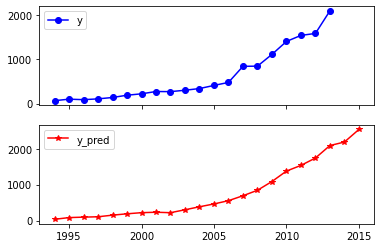

In [13]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score

data = pd.read_excel('data1_GM11.xls',index_col=0) # 读取文件是设定第一列为索引，否则默认为0开始，后面会报错找不到索引
feature = ['x1','x3','x4','x5','x6','x7','x8','x13']
print(data.index)


# 取2014年之前的数据建模
data_train = data.loc[range(1994,2014)].copy()
data_std = data_train.std() # 取标准差
data_mean = data_train.mean() # 取平均值
data_train = (data_train - data_mean)/data_std # 数据标准化


x_train = data_train[feature].values # 特征数据
y_train = data_train['y'].values # 标签数据

linearsvr = LinearSVR(max_iter=100000).fit(x_train, y_train)

x = ((data[feature]-data_mean[feature])/data_std[feature]).values #预测，并还原结果

data[u'y_pred'] = linearsvr.predict(x)*data_std['y'] + data_mean['y']

# SVR预测后保存的结果
data.to_excel('new_reg_data_GM11_revenue.xls')
print('真实值与预测值分别为：\n',data[['y','y_pred']])

print('预测图为：',data[['y','y_pred']].plot(subplots = True,
      style=['b-o','r-*']))